# - Prediction of the house price using `MLP` algorithm: <br>

<img src="../house_price_prediction/pictures/house_price_01.jpg"
     style="float: center; width:500px;height:400;"/>
<caption><center> <u><b> Figure 1 </u></b>: predicting house price <br> </center></caption><br>

- <b>given the data set `(kc_house_data.csv)`, we're going to predict the price of the house.</b>

In [1]:
# basic libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tensorflow:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
# sklearn:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# importing data from .csv file:
df = pd.read_csv("./data/kc_house_data.csv")

In [3]:
# looking at head of the data:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='price', ylabel='Count'>

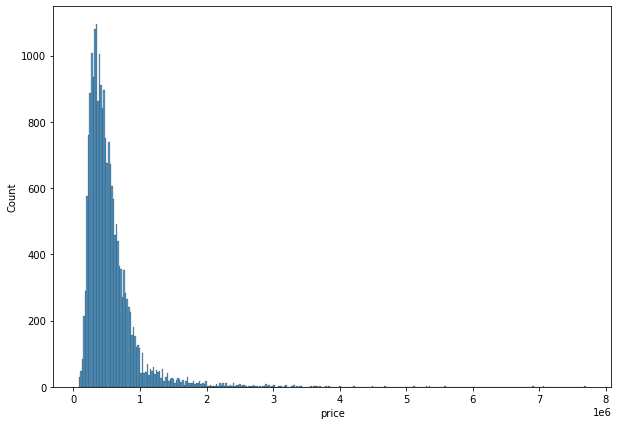

In [4]:
# histogram plot based off price:
plt.figure(figsize=(10, 7))
sns.histplot(df["price"])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

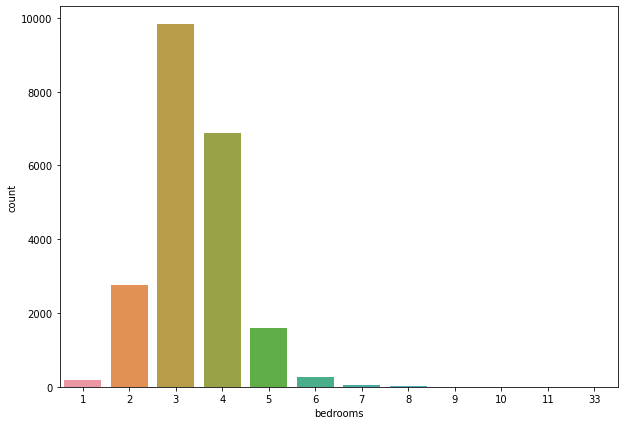

In [5]:
# plotting count-plot based off number of bedrooms:
plt.figure(figsize=(10, 7))
sns.countplot(x=df["bedrooms"])

In [6]:
# preprocessing:
# converting date sting into date-time objet:
df = df.drop("id", axis=1)                             # we don't need "id"
df['date'] = pd.to_datetime(df['date'])
# splitting date to => year and month:
df['year'] = df['date'].apply(lambda date:date.year)   # extracting year
df['month'] = df['date'].apply(lambda date:date.month) # extracting month
# getting rid of date:
df = df.drop("date", axis=1)                           # we don't need date anymore

In [7]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [8]:
# selecting features and labels:
X_inp = df.drop(labels="price", axis=1).values
y_out = df["price"].values

In [9]:
# shape of our data:
print("X_inp shape: ", X_inp.shape)
print("y_out shape: ", y_out.shape)

X_inp shape:  (21597, 20)
y_out shape:  (21597,)


In [10]:
# train/test split:
x_train, x_test, y_train, y_test = train_test_split(X_inp,
                                                    y_out,
                                                    test_size=0.3,
                                                    random_state=42)

In [11]:
# shape of our train / test splitted data:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (15117, 20)
x_test shape:  (6480, 20)
y_train shape:  (15117,)
y_test shape:  (6480,)


In [12]:
# scaling our data => normalizing => MinMaxScaler()
MnMx_scaler = MinMaxScaler()
MnMx_scaler.fit(x_train)
# normalized data:
x_train_scaled = MnMx_scaler.transform(x_train)
x_test_scaled = MnMx_scaler.transform(x_test)

In [13]:
# creating Early Stopping:
early_stop = EarlyStopping(monitor="loss",
                           patience=10)

In [14]:
# creating our mlp model:
mlp_model = Sequential()

# adding layers:
mlp_model.add(Dense(units=19,
                    activation="relu"))   # hidden layer=1

mlp_model.add(Dense(units=10,
                    activation="relu"))   # hidden layer=2

mlp_model.add(Dense(units=10,
                    activation="relu"))   # hidden layer=3

mlp_model.add(Dense(units=10,
                    activation="relu"))   # hidden layer=4

# last layer => output:
mlp_model.add(Dense(1))                   # output layer

# compiling the model:
mlp_model.compile(optimizer="adam",
                  loss="mse")

In [15]:
# training the model (fit):
mlp_model.fit(x=x_train_scaled,
              y=y_train,
              validation_data=(x_test_scaled, y_test),
              epochs=400,
              batch_size=128,
              callbacks=early_stop)

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 429748322304.0000 - val_loss: 420118003712.0000
Epoch 2/400
119/119 [==============================] - 1s 4ms/step - loss: 429591560192.0000 - val_loss: 419710894080.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 428364759040.0000 - val_loss: 417150402560.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 422896173056.0000 - val_loss: 407747231744.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 406711402496.0000 - val_loss: 383543148544.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 371041009664.0000 - val_loss: 336093970432.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 310127427584.0000 - val_loss: 264354906112.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 229587959808.0000 - val_loss: 182783705088.0000
Epoch 9/400
119/

119/119 [==============================] - 0s 3ms/step - loss: 41348046848.0000 - val_loss: 43246563328.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 41069494272.0000 - val_loss: 42935029760.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 40752504832.0000 - val_loss: 42614607872.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 40445349888.0000 - val_loss: 42309111808.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 40164257792.0000 - val_loss: 42026995712.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 39881875456.0000 - val_loss: 41701715968.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 39637082112.0000 - val_loss: 41483091968.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 39324696576.0000 - val_loss: 41139671040.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 32839491584.0000 - val_loss: 34143309824.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32792440832.0000 - val_loss: 34152472576.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32765925376.0000 - val_loss: 34057936896.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32754008064.0000 - val_loss: 34026528768.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32701577216.0000 - val_loss: 33973389312.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32667103232.0000 - val_loss: 33954029568.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32616263680.0000 - val_loss: 33891897344.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32609656832.0000 - val_loss: 33851535360.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31038402560.0000 - val_loss: 32116600832.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31006078976.0000 - val_loss: 32120379392.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 30987739136.0000 - val_loss: 32044521472.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 30942402560.0000 - val_loss: 32027787264.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 30929256448.0000 - val_loss: 32098840576.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 30931529728.0000 - val_loss: 31982145536.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 30918719488.0000 - val_loss: 31967920128.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 30872307712.0000 - val_loss: 31944763392.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30019258368.0000 - val_loss: 30951770112.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30025355264.0000 - val_loss: 30961393664.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30006904832.0000 - val_loss: 30922338304.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30017947648.0000 - val_loss: 30949232640.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 29990856704.0000 - val_loss: 30925680640.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 29990666240.0000 - val_loss: 30891304960.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 29968828416.0000 - val_loss: 30874664960.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 29937625088.0000 - val_loss: 30865373184.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29391738880.0000 - val_loss: 30411755520.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 29400856576.0000 - val_loss: 30340460544.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 29392009216.0000 - val_loss: 30343663616.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29381986304.0000 - val_loss: 30318233600.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 29407770624.0000 - val_loss: 30328588288.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 29370400768.0000 - val_loss: 30316302336.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29391857664.0000 - val_loss: 30321631232.0000
Epoch 340/400
119/119 [==============================] - ETA: 0s - loss: 29262508032.000 - 0s 3ms/step - loss: 29334272000.0000 - val_loss: 30292674560.0

119/119 [==============================] - 0s 3ms/step - loss: 28873474048.0000 - val_loss: 29882417152.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 28884406272.0000 - val_loss: 29892487168.0000


In [16]:
# saving the model:
mlp_model.save("./saved_model/house_price_predictor.h5")

In [17]:
# converting losses into DataFrame:
losses = pd.DataFrame(mlp_model.history.history)
losses

,loss,val_loss
0,4.297483e+11,4.201180e+11
1,4.295916e+11,4.197109e+11
2,4.283648e+11,4.171504e+11
3,4.228962e+11,4.077472e+11
4,4.067114e+11,3.835431e+11
...,...,...
395,2.888252e+10,2.989302e+10
396,2.888781e+10,2.988302e+10
397,2.887012e+10,2.987961e+10
398,2.887347e+10,2.988242e+10


Text(0, 0.5, 'loss')

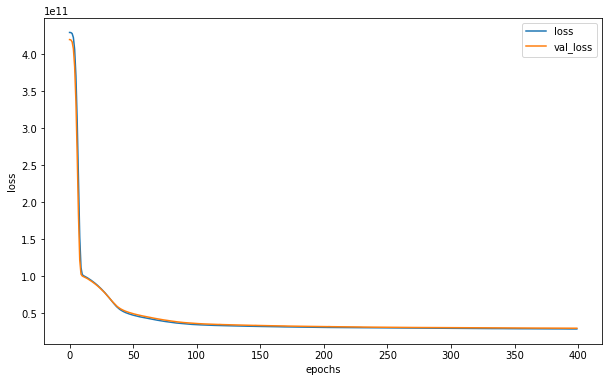

In [18]:
# plotting loss & val_loss:
losses.plot(figsize=(10, 6))
plt.xlabel("epochs")
plt.ylabel("loss")

In [19]:
# evaluation of the model using metrics => mean squared error, mean absolute error:
# predictons by MLP network:

# mean absoulte error:
predictions = mlp_model.predict(x_test_scaled)
mae = mean_absolute_error(y_true=y_test,
                          y_pred=predictions)
# mean squeared error:
mse = mean_squared_error(y_true=y_test,
                         y_pred=predictions)

# print:
print("mean abosolute error: ", mae)
print("mean squared error: ", mse)
print("root mean squared error:", np.sqrt(mse))

mean abosolute error:  107705.59497010031
mean squared error:  29892490869.186684
root mean squared error: 172894.4500820853


In [20]:
# predict on new data:
test_01 = x_test_scaled[0].reshape(1, 20)
prediction_01 = mlp_model.predict(test_01)

print("the price of the house is: ", prediction_01[0,0], "$")

the price of the house is:  229580.05 $


# The End